<a href="https://colab.research.google.com/github/kavravis/Data-Cleaning/blob/main/Clean_and_crisp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/interview_project.xlsx'
df = pd.ExcelFile(file_path)

# Loading each sheet
mls_data = pd.read_excel(df, 'MLS data')
streaming_landing = pd.read_excel(df, 'streaming_landing')
trajektory_events = pd.read_excel(df, '2023 Trajektory events')
team_dim = pd.read_excel(df, 'trajektory_mls_team_dim')
missing_games=pd.read_excel(df,'missing games')

In [ ]:
# Cleaning mls data
#1Dropping duplicates

mls_data.drop_duplicates() #no duplicates

,EVENT_TYPE,COUNTRY,DATE,EVENT_TITLE,First Name,DURATION,MINUTES,AMA,Live and Replay AMA
0,Live Match,AE,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,-,NaN,NaN
1,Live Match,AM,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,3,0,0
2,Live Match,AR,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,3218,24,24
3,Live Match,AT,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,275,2,2
4,Live Match,AU,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,5236,39,39
...,...,...,...,...,...,...,...,...,...
34163,Live Match,UA,2023-12-09,Columbus Crew VS Los Angeles Football Club,Columbus,128,5048,39,39
34164,Live Match,UG,2023-12-09,Columbus Crew VS Los Angeles Football Club,Columbus,128,203,2,2
34165,Live Match,US,2023-12-09,Columbus Crew VS Los Angeles Football Club,Columbus,128,25782055,201422,201422
34166,Live Match,VE,2023-12-09,Columbus Crew VS Los Angeles Football Club,Columbus,128,224,2,2


In [ ]:
#2 drop column live an dreplay ama as redundant

mls_data = mls_data.drop(columns='Live and Replay AMA')

mls_data.head()

,EVENT_TYPE,COUNTRY,DATE,EVENT_TITLE,First Name,DURATION,MINUTES,AMA
0,Live Match,AE,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,-,NaN
1,Live Match,AM,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,3,0
2,Live Match,AR,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,3218,24
3,Live Match,AT,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,275,2
4,Live Match,AU,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,5236,39


In [ ]:
#3 event title - stdize the format of the names

# Replace 'o?=' with 'e' in the 'EVENT_TITLE' column only
mls_data['EVENT_TITLE'] = mls_data['EVENT_TITLE'].astype(str).str.replace(r'o\?=', 'e', regex=True)


In [ ]:
#4 replacing '-' with NaN

mls_data['AMA'] = mls_data['AMA'].replace("-", np.nan)
mls_data['MINUTES'] = mls_data['MINUTES'].replace("-", np.nan)

# Step to Convert columns to numeric explicitly to avoid downcasting warnings
mls_data['AMA'] = pd.to_numeric(mls_data['AMA'], errors='coerce')
mls_data['MINUTES'] = pd.to_numeric(mls_data['MINUTES'], errors='coerce')

# Display to verify the result
print(mls_data[[ 'MINUTES','AMA']].head(100))

    MINUTES    AMA
0       NaN    NaN
1       3.0    0.0
2    3218.0   24.0
3     275.0    2.0
4    5236.0   39.0
..      ...    ...
95   1592.0   13.0
96    237.0    2.0
97   5123.0   40.0
98  14683.0  116.0
99     20.0    0.0

[100 rows x 2 columns]


<ipython-input-5-97f481b0dbe5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mls_data['AMA'] = mls_data['AMA'].replace("-", np.nan)
<ipython-input-5-97f481b0dbe5>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mls_data['MINUTES'] = mls_data['MINUTES'].replace("-", np.nan)


In [ ]:
#5 Fill NaN values with an empty string - coz makes more sense to drop rwos when taking other factors into consideration

mls_data['AMA'] = mls_data['AMA'].fillna('')
mls_data['MINUTES'] = mls_data['MINUTES'].fillna('')

# Display the data to verify the changes
print(mls_data[['MINUTES', 'AMA']].head(20))

    MINUTES   AMA
0                
1       3.0   0.0
2    3218.0  24.0
3     275.0   2.0
4    5236.0  39.0
5     207.0   2.0
6     429.0   3.0
7     117.0   1.0
8      36.0   0.0
9    9237.0  69.0
10      2.0   0.0
11  12637.0  95.0
12    202.0   2.0
13   1384.0  10.0
14   1858.0  14.0
15    305.0   2.0
16     10.0   0.0
17               
18   5229.0  39.0
19    554.0   4.0


In [ ]:
#5.2 dropping rows where AMA is empty

for x in mls_data.index:
  if mls_data.loc[x,'AMA'] == '':
    mls_data.drop(x,inplace=True)

mls_data.head(25)

,EVENT_TYPE,COUNTRY,DATE,EVENT_TITLE,First Name,DURATION,MINUTES,AMA
1,Live Match,AM,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,3.0,0.0
2,Live Match,AR,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,3218.0,24.0
3,Live Match,AT,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,275.0,2.0
4,Live Match,AU,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,5236.0,39.0
5,Live Match,BE,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,207.0,2.0
6,Live Match,BG,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,429.0,3.0
7,Live Match,BH,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,117.0,1.0
8,Live Match,BO,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,36.0,0.0
9,Live Match,BR,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,9237.0,69.0
10,Live Match,BS,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,2.0,0.0


In [ ]:
#6 change date to event_date
mls_data = mls_data.rename(columns={'DATE': 'event_date'})
mls_data.head()

,EVENT_TYPE,COUNTRY,event_date,EVENT_TITLE,First Name,DURATION,MINUTES,AMA
1,Live Match,AM,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,3.0,0.0
2,Live Match,AR,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,3218.0,24.0
3,Live Match,AT,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,275.0,2.0
4,Live Match,AU,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,5236.0,39.0
5,Live Match,BE,2023-02-25,Atlanta United VS San Jose Earthquakes,Atlanta,133,207.0,2.0


In [ ]:
#7 Group by event_date and event_title, then sum the AMA values

mls_data = mls_data.groupby(['event_date','EVENT_TITLE']).agg({'AMA': 'sum'}).reset_index()

# Rename the column for clarity
mls_data = mls_data.rename(columns={'AMA': 'total_AMA'})

print(mls_data)

    event_date                                       EVENT_TITLE total_AMA
0   2023-02-25            Atlanta United VS San Jose Earthquakes   38564.0
1   2023-02-25                    Austin FC VS St. Louis CITY SC   94815.0
2   2023-02-25            Charlotte FC VS New England Revolution   26619.0
3   2023-02-25                         D.C. United VS Toronto FC   18719.0
4   2023-02-25                FC Cincinnati VS Houston Dynamo FC   25933.0
..         ...                                               ...       ...
597 2023-11-26         Houston Dynamo FC VS Sporting Kansas City   84711.0
598 2023-11-26  Seattle Sounders FC VS Los Angeles Football Club  161658.0
599 2023-12-02                    FC Cincinnati VS Columbus Crew  155910.0
600 2023-12-02    Los Angeles Football Club VS Houston Dynamo FC  126791.0
601 2023-12-09        Columbus Crew VS Los Angeles Football Club  215008.0

[602 rows x 3 columns]


In [ ]:
#8 Split the EVENT_TITLE at " vs " into home_team and away_team
mls_data[['home_team', 'away_team']] = mls_data['EVENT_TITLE'].str.split('VS', expand=True)

print(mls_data)

    event_date                                       EVENT_TITLE total_AMA  \
0   2023-02-25            Atlanta United VS San Jose Earthquakes   38564.0   
1   2023-02-25                    Austin FC VS St. Louis CITY SC   94815.0   
2   2023-02-25            Charlotte FC VS New England Revolution   26619.0   
3   2023-02-25                         D.C. United VS Toronto FC   18719.0   
4   2023-02-25                FC Cincinnati VS Houston Dynamo FC   25933.0   
..         ...                                               ...       ...   
597 2023-11-26         Houston Dynamo FC VS Sporting Kansas City   84711.0   
598 2023-11-26  Seattle Sounders FC VS Los Angeles Football Club  161658.0   
599 2023-12-02                    FC Cincinnati VS Columbus Crew  155910.0   
600 2023-12-02    Los Angeles Football Club VS Houston Dynamo FC  126791.0   
601 2023-12-09        Columbus Crew VS Los Angeles Football Club  215008.0   

                      home_team                   away_team  
0

In [ ]:
#9 Mapping the home team and away team with team_dim page where data was inconsisitent and dict had to be made


#converting to lowercase and stripping extra spaces
mls_data['home_team'] = mls_data['home_team'].str.strip().str.lower()
mls_data['away_team'] = mls_data['away_team'].str.strip().str.lower()

# team_mapping in lowercase to match standardized data
team_mapping = {
    'atlanta united': 'Atlanta United FC',
    'chicago fire fc': 'Chicago Fire',
    'columbus crew': 'Columbus Crew SC',
    'orlando city': 'Orlando City SC',
    'los angeles football club': 'Los Angeles FC',
    'houston dynamo fc': 'Houston Dynamo',
    'minnesota united': 'Minnesota United FC',
    'la galaxy': 'Los Angeles Galaxy',
    'new york city football club': 'New York City FC',
    'charlotte fc': 'Charlotte FC',

'st. louis city sc': 'St Louis City SC',
'austin fc': 'Austin FC',
'san jose earthquakes': 'San Jose Earthquakes',
'colorado rapids': 'Colorado Rapids',
'd.c. united': 'DC United',
'inter miami cf': 'Inter Miami CF',
'sporting kansas city': 'Sporting Kansas City',
'new england revolution': 'New England Revolution',
'new york red bulls': 'New York Red Bulls',
'fc cincinnati': 'FC Cincinnati',
'portland timbers': 'Portland Timbers',
'philadelphia union': 'Philadelphia Union',
'nashville sc': 'Nashville SC',
'fc dallas': 'FC Dallas',
'real salt lake': 'Real Salt Lake',
'seattle sounders fc': 'Seattle Sounders FC',
'vancouver whitecaps fc': 'Vancouver Whitecaps FC',
'cf montreal': 'CF Montreal',
'toronto fc': 'Toronto FC'
}

#replace values in 'home_team' and 'away_team' columns with proper capitalization from team_mapping
mls_data['home_team'] = mls_data['home_team'].replace(team_mapping)
mls_data['away_team'] = mls_data['away_team'].replace(team_mapping)


# Set pandas display options to avoid wrapping in the output
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)  # Show all columns without truncation
pd.set_option('display.width', 1000)  # Set a large width to prevent line breaks
print(mls_data)


    event_date                                       EVENT_TITLE total_AMA            home_team               away_team
0   2023-02-25            Atlanta United VS San Jose Earthquakes   38564.0    Atlanta United FC    San Jose Earthquakes
1   2023-02-25                    Austin FC VS St. Louis CITY SC   94815.0            Austin FC        St Louis City SC
2   2023-02-25            Charlotte FC VS New England Revolution   26619.0         Charlotte FC  New England Revolution
3   2023-02-25                         D.C. United VS Toronto FC   18719.0            DC United              Toronto FC
4   2023-02-25                FC Cincinnati VS Houston Dynamo FC   25933.0        FC Cincinnati          Houston Dynamo
..         ...                                               ...       ...                  ...                     ...
597 2023-11-26         Houston Dynamo FC VS Sporting Kansas City   84711.0       Houston Dynamo    Sporting Kansas City
598 2023-11-26  Seattle Sounders FC VS L

In [ ]:
#10 creating event_name column to match trajecktory events

# Create the event_name column in the format "Away Team @ Home Team"
mls_data['event_name'] = mls_data['away_team'] + ' @ ' + mls_data['home_team']


# Set pandas display options to avoid wrapping in the output
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)  # Show all columns without truncation
pd.set_option('display.width', 1000)  # Set a large width to prevent line breaks
print(mls_data)

    event_date                                       EVENT_TITLE total_AMA            home_team               away_team                                event_name
0   2023-02-25            Atlanta United VS San Jose Earthquakes   38564.0    Atlanta United FC    San Jose Earthquakes  San Jose Earthquakes @ Atlanta United FC
1   2023-02-25                    Austin FC VS St. Louis CITY SC   94815.0            Austin FC        St Louis City SC              St Louis City SC @ Austin FC
2   2023-02-25            Charlotte FC VS New England Revolution   26619.0         Charlotte FC  New England Revolution     New England Revolution @ Charlotte FC
3   2023-02-25                         D.C. United VS Toronto FC   18719.0            DC United              Toronto FC                    Toronto FC @ DC United
4   2023-02-25                FC Cincinnati VS Houston Dynamo FC   25933.0        FC Cincinnati          Houston Dynamo            Houston Dynamo @ FC Cincinnati
..         ...              

In [ ]:
#11 Union and find A-B and B-A

#Standardize event_name by converting to lowercase and stripping extra spaces in both DataFrames
mls_data['event_name'] = mls_data['event_name'].str.lower().str.strip()
trajektory_events['event_name'] = trajektory_events['event_name'].str.lower().str.strip()


# Perform an outer join to find both common and unique games based on standardized event_name and event_date
comparison = mls_data[['event_date', 'event_name']].merge(
    trajektory_events[['event_date', 'event_name']],
    on=['event_date', 'event_name'],
    how='outer',
    indicator=True
)

In [ ]:
#11.1 -  A-B

# Find events only in grouped_ama (missing in Trajektory)
missing_in_trajektory = comparison[comparison['_merge'] == 'left_only'][['event_date', 'event_name']]

# Printing the results
print("Games only in MLS data (missing from Trajektory events):")
print(missing_in_trajektory)

Games only in MLS data (missing from Trajektory events):
    event_date                                    event_name
266 2023-06-21      vancouver whitecaps fc @ colorado rapids
298 2023-07-04            portland timbers @ colorado rapids
342 2023-07-21                    inter miami cf @ cruz azul
345 2023-07-21                       mazatlen fc @ austin fc
346 2023-07-21            vancouver whitecaps fc @ club leen
347 2023-07-22             club tijuana @ philadelphia union
349 2023-07-22                           pumas @ cf montreal
355 2023-07-23                   atlas fc @ new york city fc
356 2023-07-23                colorado rapids @ nashville sc
357 2023-07-23             minnesota united fc @ club puebla
363 2023-07-25                       club necaxa @ fc dallas
364 2023-07-25                       fc juerez @ mazatlen fc
365 2023-07-25           houston dynamo @ club santos laguna
369 2023-07-26                club leen @ los angeles galaxy
370 2023-07-26           clu

In [ ]:
#11.2 - B-A

# Find events only in trajektory_events (missing in MLS data)
missing_in_mls_data = comparison[comparison['_merge'] == 'right_only'][['event_date', 'event_name']]

print("\nGames only in Trajektory events (missing from MLS data):")
print(missing_in_mls_data)


Games only in Trajektory events (missing from MLS data):
    event_date                                  event_name
321 2023-07-12          portland timbers @ colorado rapids
340 2023-07-21                  cruz azul @ inter miami cf
343 2023-07-21               leon @ vancouver whitecaps fc
344 2023-07-21                     mazatlan fc @ austin fc
350 2023-07-22                    pumas unam @ cf montreal
353 2023-07-22                tijuana @ philadelphia union
354 2023-07-23                    atlas @ new york city fc
358 2023-07-23              nashville sc @ colorado rapids
359 2023-07-23                puebla @ minnesota united fc
366 2023-07-25                          necaxa @ fc dallas
367 2023-07-25                     santos @ houston dynamo
368 2023-07-26  atletico san luis @ new england revolution
372 2023-07-26                  monterrey @ real salt lake
375 2023-07-26              queretaro @ philadelphia union
377 2023-07-26              tigres uanl @ portland timber

In [ ]:
missing_in_mls_data.count()

,0
event_date,52
event_name,52


In [ ]:
missing_in_trajektory.count()

,0
event_date,59
event_name,59


In [ ]:
#12 Intersection for streaming landing page format

# Perform an inner join to get only the common games
common_games = mls_data.merge(
    trajektory_events,
    on=['event_date', 'event_name'],
    how='inner'
)

# printing
print("Common games with total AMA:")
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)  # Show all columns without truncation
pd.set_option('display.width', 1000)  # Set a large width to prevent line breaks
print(common_games[['event_key','event_date', 'event_name', 'total_AMA']])

Common games with total AMA:
                                event_key event_date                                event_name total_AMA
0    29c21dc3-0a44-46ba-af8c-4897c9aeb880 2023-02-25  san jose earthquakes @ atlanta united fc   38564.0
1    5094d6ae-a7b5-4f64-8ca2-4f03246aa508 2023-02-25              st louis city sc @ austin fc   94815.0
2    d11e5a5e-71e4-441c-91c8-06de70e7ea1b 2023-02-25     new england revolution @ charlotte fc   26619.0
3    c2293fa4-6f8d-4440-8f4d-86fee2a4b3dd 2023-02-25                    toronto fc @ dc united   18719.0
4    afaabde3-2774-41e5-ac8f-cdd54af04cac 2023-02-25            houston dynamo @ fc cincinnati   25933.0
..                                    ...        ...                                       ...       ...
538  d011fd41-da06-4f38-ac98-1baad2426959 2023-11-26     sporting kansas city @ houston dynamo   84711.0
539  ab9ac84c-6756-42a9-955e-853996b29beb 2023-11-26      los angeles fc @ seattle sounders fc  161658.0
540  af49a73c-76bc-47f6-be

In [ ]:
#13 final for landing page

#--1
# Split 'event_name' into 'away_team_name' and 'home_team_name'
common_games[['away_team_name', 'home_team_name']] = common_games['event_name'].str.split(' @ ', expand=True)

#--2
# Standardize team names in team_dim for consistent mapping
team_dim['team_name'] = team_dim['team_name'].str.strip().str.lower()

# Standardize team names in common_games for consistent mapping
common_games['home_team_name'] = common_games['home_team_name'].str.strip().str.lower()
common_games['away_team_name'] = common_games['away_team_name'].str.strip().str.lower()

#--3
# dict mapping team names to team keys
team_key_mapping = dict(zip(team_dim['team_name'], team_dim['team_key']))

#--4
#Map team keys for both home and away teams
common_games['home_team_key'] = common_games['home_team_name'].map(team_key_mapping)
common_games['away_team_key'] = common_games['away_team_name'].map(team_key_mapping)

#--5
#Select and print the required columns
final_output = common_games[['event_key', 'event_name', 'event_date', 'home_team_name', 'home_team_key','away_team_name',  'away_team_key', 'total_AMA']]

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)  # Show all columns without truncation
pd.set_option('display.width', 1000)  # Set a large width to prevent line breaks
print(final_output)

                                event_key                                event_name event_date       home_team_name                         home_team_key          away_team_name                         away_team_key total_AMA
0    29c21dc3-0a44-46ba-af8c-4897c9aeb880  san jose earthquakes @ atlanta united fc 2023-02-25    atlanta united fc  67c2a78a-f27e-421a-88ae-d5caa7206f1a    san jose earthquakes  e58c9525-bbe7-41f7-a963-c191ef0c22a5   38564.0
1    5094d6ae-a7b5-4f64-8ca2-4f03246aa508              st louis city sc @ austin fc 2023-02-25            austin fc  4bf5d23a-b2a0-4b01-8ac3-69069b54cf9c        st louis city sc  586a30fa-7fc5-4463-bbcb-efa3e48eda5a   94815.0
2    d11e5a5e-71e4-441c-91c8-06de70e7ea1b     new england revolution @ charlotte fc 2023-02-25         charlotte fc  cf77f13a-0cfb-455f-867b-8df7385b6aa8  new england revolution  ac165231-484c-48d2-bef8-a22d3170a296   26619.0
3    c2293fa4-6f8d-4440-8f4d-86fee2a4b3dd                    toronto fc @ dc united 2023-02-25  

**1.Top popular games**


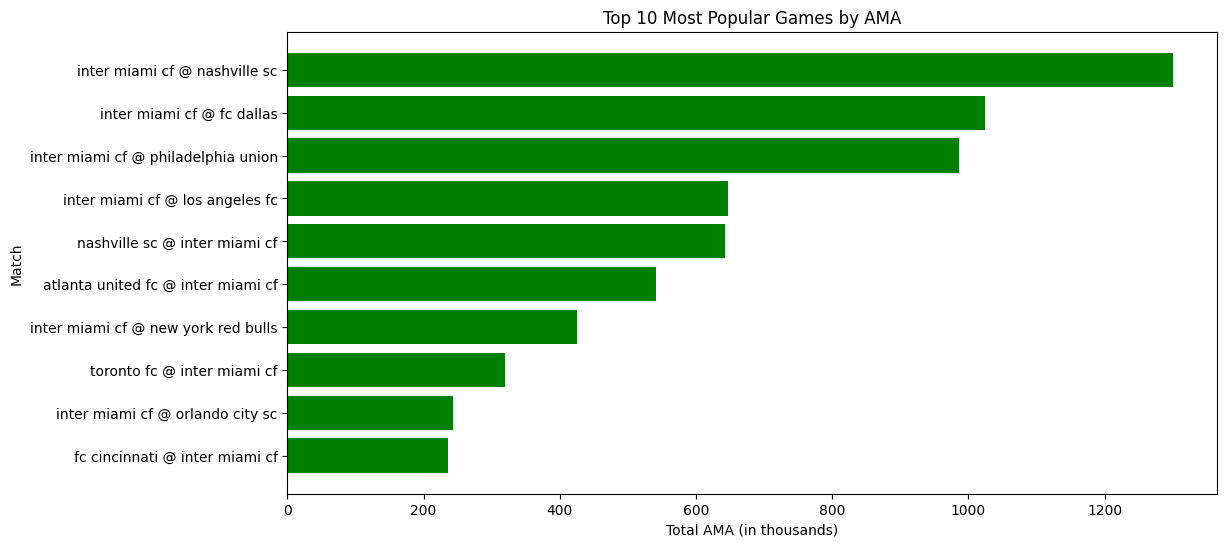

In [ ]:
# Sort the data by AMA to find the top matches
top_games = final_output[['event_name', 'total_AMA']].sort_values(by='total_AMA', ascending=False).head(10)

top_games['total_AMA'] = top_games['total_AMA'] / 1000  # Adjust scale to thousands

plt.figure(figsize=(12, 6))
plt.barh(top_games['event_name'], top_games['total_AMA'], color='green')
plt.title('Top 10 Most Popular Games by AMA')
plt.xlabel('Total AMA (in thousands)')
plt.ylabel('Match')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


**2.Top-Performing Teams by AMA This visualization will show the top teams by their total AMA across all games. We’ll calculate the AMA for each team by aggregating the total AMA when they are either home or away.**

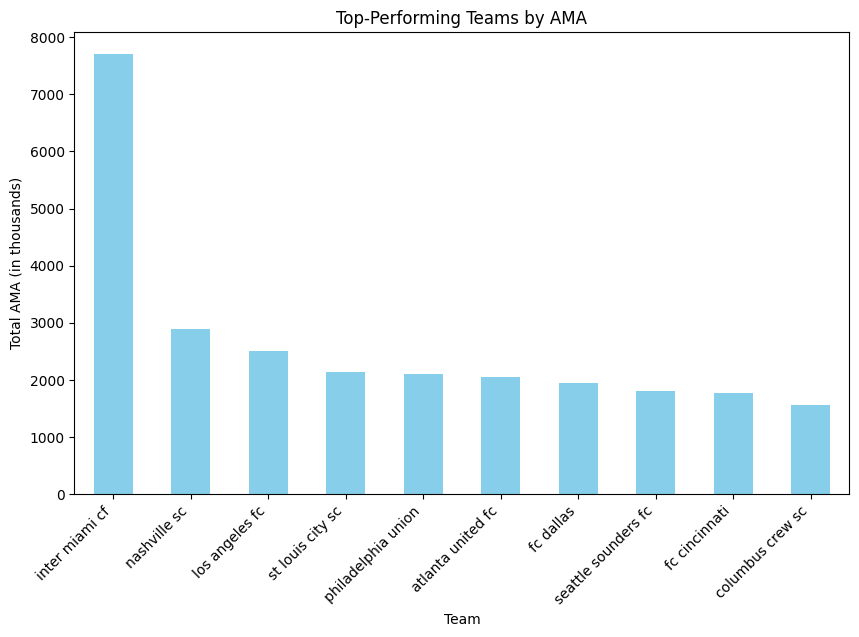

In [ ]:
team_ama = final_output.groupby(['home_team_name'])['total_AMA'].sum().add(
    final_output.groupby(['away_team_name'])['total_AMA'].sum(), fill_value=0
).sort_values(ascending=False) / 1000  # Adjust scale to thousands

plt.figure(figsize=(10, 6))
team_ama.head(10).plot(kind='bar', color='skyblue')
plt.title('Top-Performing Teams by AMA')
plt.xlabel('Team')
plt.ylabel('Total AMA (in thousands)')
plt.xticks(rotation=45, ha='right')
plt.show()

**3.Seasonal Trend**


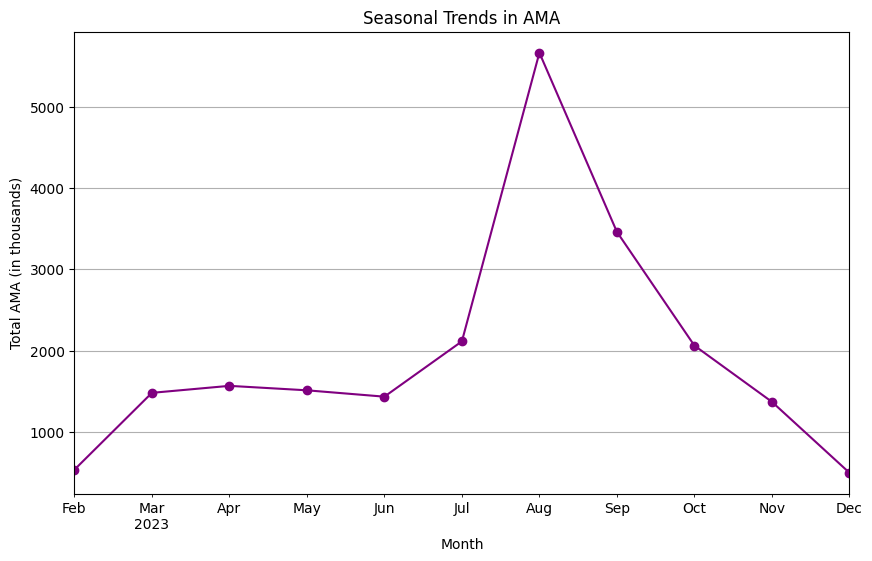

In [ ]:
# Ensure final_output is a copy to avoid chained assignment issues
final_output = final_output.copy()

# Convert event_date to datetime if it's not already
final_output['event_date'] = pd.to_datetime(final_output['event_date'])

# Extract month and year from the date
final_output['month'] = final_output['event_date'].dt.to_period('M')

# Group by month to find total AMA per month and adjust AMA to thousands
monthly_ama = final_output.groupby('month')['total_AMA'].sum() / 1000  # AMA in thousands

# Plot seasonal trends
plt.figure(figsize=(10, 6))
monthly_ama.plot(kind='line', marker='o', color='purple')
plt.title('Seasonal Trends in AMA')
plt.xlabel('Month')
plt.ylabel('Total AMA (in thousands)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

4.Effect of Game Timing on AMA To analyze the effect of game timing, let’s assume you have a column in final_output indicating the day of the week. If not, we’ll extract it from the **event_date** **bold text**

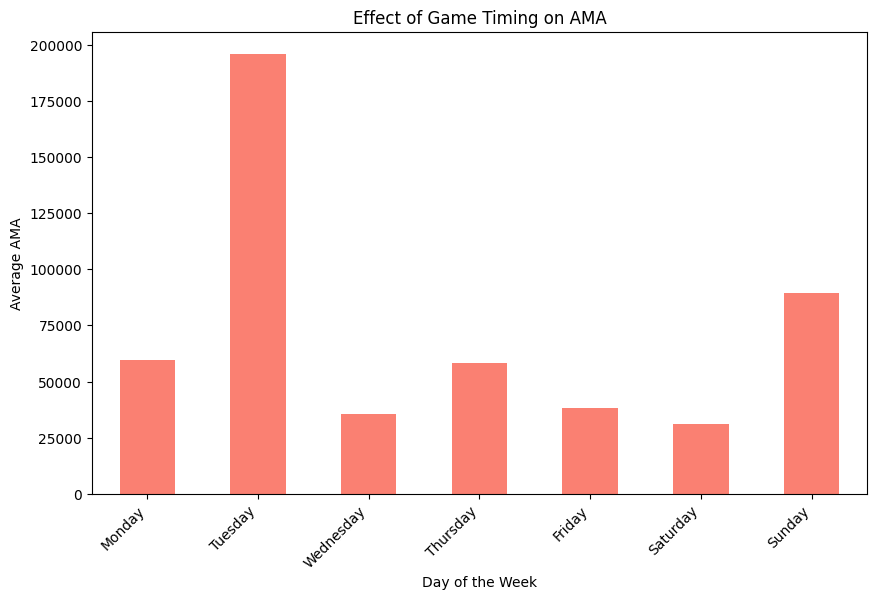

In [ ]:
# Extract day of the week from event_date
final_output['day_of_week'] = final_output['event_date'].dt.day_name()

# Group by day of the week and calculate average AMA
weekday_ama = final_output.groupby('day_of_week')['total_AMA'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot average AMA by day of the week
plt.figure(figsize=(10, 6))
weekday_ama.plot(kind='bar', color='salmon')
plt.title('Effect of Game Timing on AMA')
plt.xlabel('Day of the Week')
plt.ylabel('Average AMA')
plt.xticks(rotation=45, ha='right')
plt.show()


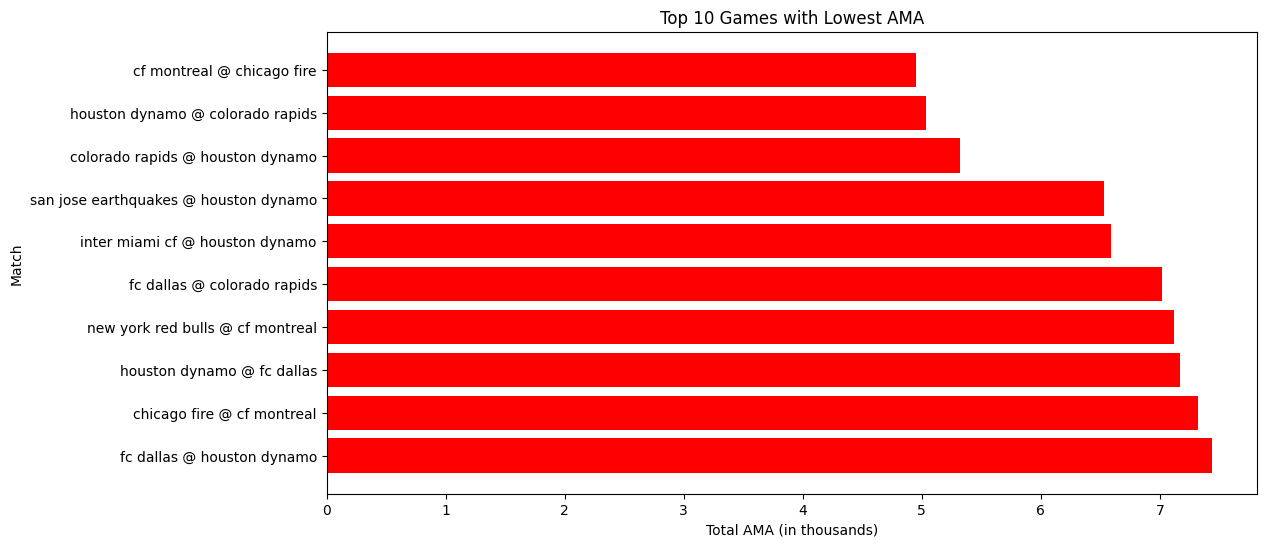

                                event_name total_AMA
313             cf montreal @ chicago fire     4.949
326       houston dynamo @ colorado rapids     5.033
490       colorado rapids @ houston dynamo     5.325
259  san jose earthquakes @ houston dynamo     6.535
115        inter miami cf @ houston dynamo     6.588
302            fc dallas @ colorado rapids     7.018
111       new york red bulls @ cf montreal     7.121
185             houston dynamo @ fc dallas     7.169
416             chicago fire @ cf montreal      7.32
461             fc dallas @ houston dynamo     7.442


In [ ]:
5.# Sort the data to find the games with the lowest AMA
lowest_ama_games = final_output[['event_name', 'total_AMA']].sort_values(by='total_AMA', ascending=True).head(10)

lowest_ama_games['total_AMA'] = lowest_ama_games['total_AMA'] / 1000


plt.figure(figsize=(12, 6))
plt.barh(lowest_ama_games['event_name'], lowest_ama_games['total_AMA'], color='red')
plt.title('Top 10 Games with Lowest AMA')
plt.xlabel('Total AMA (in thousands)')
plt.ylabel('Match')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()
print(lowest_ama_games)
